In [119]:
import numpy as np
from scipy.io import wavfile
import librosa
import matplotlib.pyplot as plt

In [122]:
# taken from https://stackoverflow.com/questions/38453249/is-there-a-matlabs-buffer-equivalent-in-numpy 
def buffer(X = np.array([]), n = 1, p = 0):
    #buffers data vector X into length n column vectors with overlap p
    #excess data at the end of X is discarded
    n = int(n) #length of each data vector
    p = int(p) #overlap of data vectors, 0 <= p < n-1
    L = len(X) #length of data to be buffered
    m = int(np.floor((L-n)/(n-p)) + 1) #number of sample vectors (no padding)
    data = np.zeros([n,m]) #initialize data matrix
    for startIndex,column in zip(range(0,L-n,n-p),range(0,m)):
        data[:,column] = X[startIndex:startIndex + n] #fill in by column
    return data

In [123]:
y, s = librosa.load('q1.wav',sr=44100)
print(np.shape(y))
frames = buffer(y, 20*Fs/1000, (20*Fs/1000)-1);
print(np.shape(frames))
E = np.sum(np.multiply(frames, frames), axis=0)
print(np.shape(E))
threshold = np.mean(E)
print(threshold)

(45840,)
(160, 45681)
(45681,)
2.2052217458632764


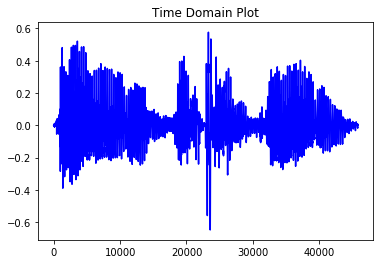

In [124]:
plt.title('Time Domain Plot')
plt.plot(y, 'b')
plt.show()

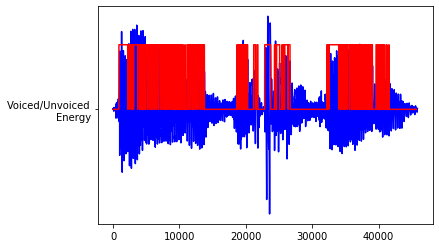

In [125]:
sec=np.shape(frames)[1]
vuv = np.zeros((1, sec))
vuv = np.where(E<threshold, 0, 10)
np.shape(vuv)
plt.plot('Voiced/Unvoiced\nEnergy')
plt.plot(y,'b')
plt.plot(vuv/25, 'r')

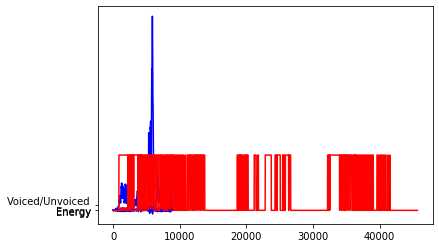

In [127]:
y = y[4*s//10:6*s//10]
frames = buffer(y, 20*Fs/1000, (20*Fs/1000)-1);
E = np.sum(np.multiply(frames, frames), axis=0)
plt.plot('Energy')
plt.plot(E, 'b')
plt.plot(vuv, 'r')
sec=np.shape(frames)[1]
vuv = np.zeros((1, sec))
vuv = np.where(E<threshold, 0, 10)
np.shape(vuv)
plt.plot('Voiced/Unvoiced\nEnergy')
plt.plot(y,'b')
plt.plot(vuv/25, 'r')

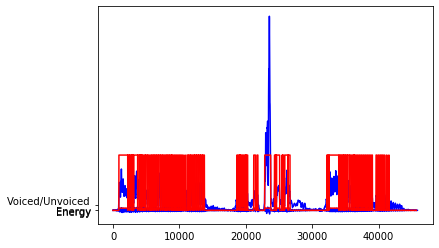

In [126]:
plt.plot('Energy')
plt.plot(E, 'b')
plt.plot(vuv, 'r')
sec=np.shape(frames)[1]
vuv = np.zeros((1, sec))
vuv = np.where(E<threshold, 0, 10)
np.shape(vuv)
plt.plot('Voiced/Unvoiced\nEnergy')
plt.plot(y,'b')
plt.plot(vuv/25, 'r')

(8820,) (8820,)
323
136.53250773993807 Hz


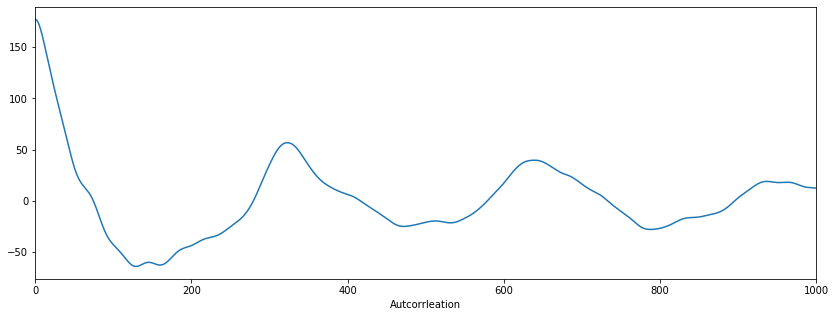

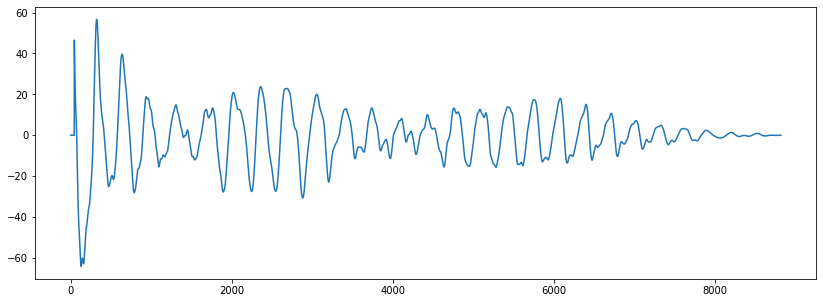

In [99]:
r = librosa.autocorrelate(y)
print(y.shape, r.shape)
plt.figure(figsize=(14, 5))
plt.plot(r)
plt.xlabel("Autcorrleation")
plt.xlim(0,1000)

r[:45] = 00  # set the first few to zero because val is maximum at t=0
plt.figure(figsize=(14, 5))
plt.plot(r)
t_max = r.argmax()
print(t_max)
print(float(s)/t_max,"Hz")

882
(1, 2)
(8820,)
[0.01054422 0.00657596]
149


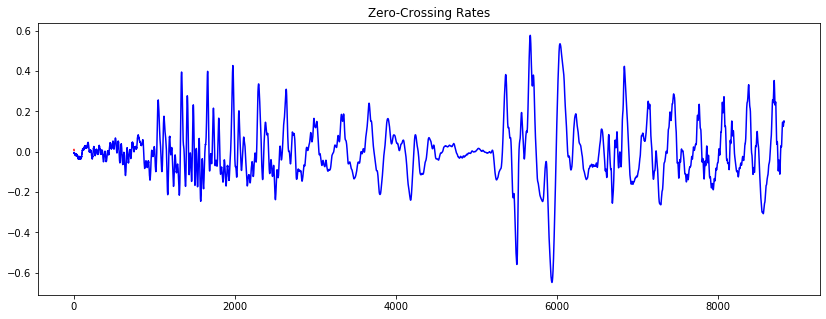

In [118]:
print(s*2//100)
zcrs = librosa.feature.zero_crossing_rate(y,frame_length=s*2//10,hop_length=s*2//10)
print(zcrs.shape)
print(y.shape)
plt.figure(figsize=(14, 5))
plt.title('Zero-Crossing Rates')
plt.plot(y,c='b')
plt.plot(zcrs[0],c='r')
print(zcrs[0])
count=0
for i in range(1,len(y)):
    if y[i]*y[i-1]<0:
        count+=1
print(count)
    